In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv('troop_movements.csv', header=None, names=["timestamp", "unit_type", "faction", "location_x", "location_y", "destination_x", "destination_y","HomeWorld"])

In [22]:
faction_count = data["faction"].value_counts()
print(faction_count)

faction
resistance    501
empire        499
Name: count, dtype: int64


In [23]:
homeworld_count = data["HomeWorld"].value_counts()
print(homeworld_count)

HomeWorld
Kalee           31
Champala        31
Mirial          30
Vulpter         30
Trandosha       28
Tholoth         28
Aleen Minor     28
Eriadu          27
Naboo           27
Stewjon         27
Iridonia        26
Bestine IV      26
Kashyyyk        26
Muunilinst      26
Rodia           26
Dathomir        26
Haruun Kal      25
Concord Dawn    25
Toydaria        25
Dagobah         25
Socorro         25
Quermia         24
Shili           24
Zolan           24
Tund            24
Mon Cala        23
Sullust         22
Chandrila       22
Cerea           21
Alderaan        21
Serenno         21
Ojom            20
Iktotch         20
Malastare       20
Tatooine        20
Skako           20
Corellia        19
Glee Anselm     19
Troiken         19
Dorin           17
Ryloth          17
Umbara          15
Name: count, dtype: int64


In [25]:
unit_type = data["unit_type"].value_counts()
print(unit_type)

unit_type
resistance_soldier    144
unknown               127
tie_silencer          127
x-wing                127
at-at                 122
stormtrooper          120
at-st                 118
tie_fighter           115
Name: count, dtype: int64


In [26]:
data["is_resistance"]= data["faction"] == "resistance"
print(data.head())

                     timestamp           unit_type     faction  location_x  \
2025-03-17 15:14:23          1             unknown  resistance           1   
2025-03-17 15:14:22          2        tie_silencer      empire           1   
2025-03-17 15:14:21          3        tie_silencer      empire           7   
2025-03-17 15:14:20          4              x-wing      empire           4   
2025-03-17 15:14:19          5  resistance_soldier  resistance           1   

                     location_y  destination_x  destination_y   HomeWorld  \
2025-03-17 15:14:23           5              6              5    Iridonia   
2025-03-17 15:14:22           2             10              8  Muunilinst   
2025-03-17 15:14:21           4              6              3       Kalee   
2025-03-17 15:14:20           1              4              7       Dorin   
2025-03-17 15:14:19           1              5              9    Alderaan   

                     is_resistance  
2025-03-17 15:14:23           T

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7356\731319876.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="faction", data=data, palette="coolwarm")


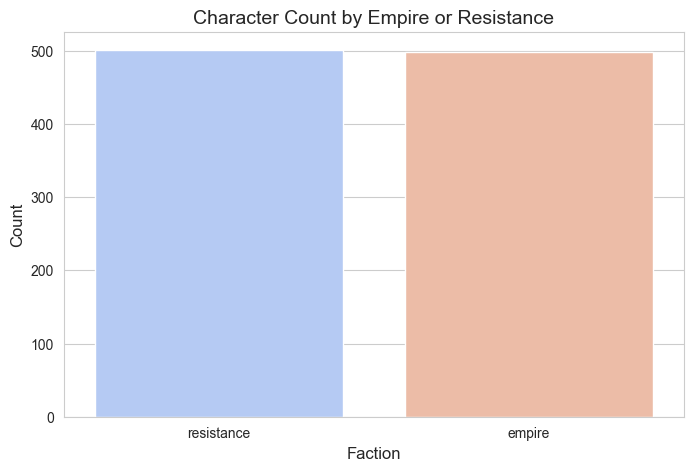

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
sns.countplot(x="faction", data=data, palette="coolwarm")

plt.xlabel("Faction", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Character Count by Empire or Resistance", fontsize=14)
plt.show()

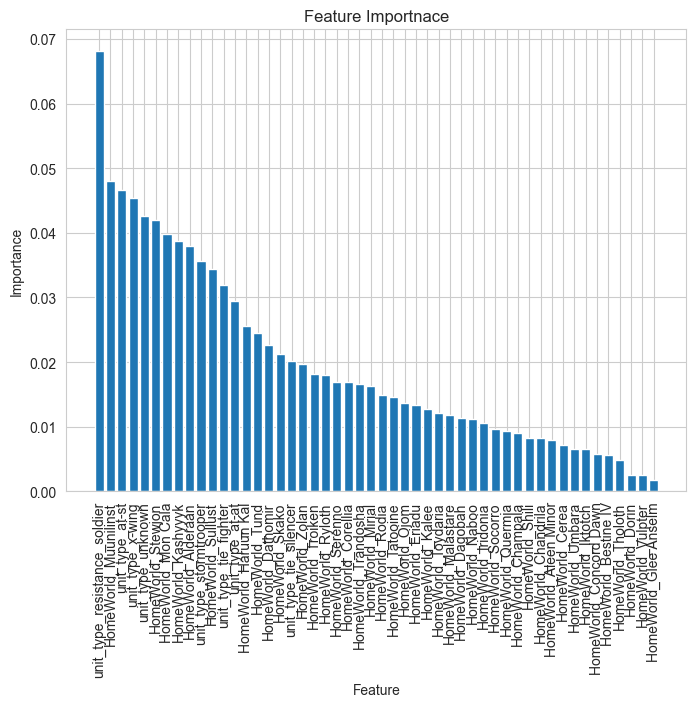

Most Influential Unit Type: unit_type_resistance_soldier


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ["HomeWorld","unit_type"]
target = "is_resistance"

x = data[features]
y = data[target]

x_encoded = pd.get_dummies(x)

X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature':x_encoded.columns, 'Importance':importances})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importnace')
plt.show()

most_influential_unit_type = feature_importances.iloc[0]['Feature']
print('Most Influential Unit Type:', most_influential_unit_type)




In [32]:
data1m = pd.read_csv('troop_movements_1m.csv')
data1m.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako


In [33]:
data1m.loc[data1m['unit_type'] == 'invalid_unit'] = 'unknown'
grouped_data = data1m.groupby(['unit_type']).size().reset_index(name='count')

print(grouped_data)

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7356\1020247172.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data1m.loc[data1m['unit_type'] == 'invalid_unit'] = 'unknown'
C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7356\1020247172.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data1m.loc[data1m['unit_type'] == 'invalid_unit'] = 'unknown'
C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7356\1020247172.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a comp

            unit_type   count
0               at-at  142724
1               at-st  142554
2  resistance_soldier  142647
3        stormtrooper  142611
4         tie_fighter  142753
5        tie_silencer  143216
6             unknown    1001
7              x-wing  142494


In [39]:
data1m[['location_x', 'location_y']] = data[['location_x','location_y']].fillna(method = 'ffill')

data1m.replace("unknown",0,inplace=True)

data1m["val1"] = data1m["val1"].astype(int)

data1m.to_parquet('cleaned_troop_movements1m.parquet', index=False)

print('data cleaning complete')

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7356\1918773855.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1m[['location_x', 'location_y']] = data[['location_x','location_y']].fillna(method = 'ffill')


KeyError: 'val1'